## **Práctica 17: Clustering Particional y Clasificación (Diabetes)**

Nombre: Alan Francisco Mora González

No. Cuenta: 113005901

Email: alanfmorag@gmail.com

### **Caso de estudio**

Estudios clínicos de diabetes en una población femenina.

**Objetivo.** Segmentar estudios clínicos y hacer una clasificación múltiple en función de los parámetros disponibles, como: número de embarazos, glucosa, presión arterial, índice de masa corporal, niveles de insulina, entre otros.

**Emplear los algoritmos:** 

* K-means para segmentar los datos.
* Bosque aleatorio para la clasificación múltiple.

**Fuente de datos:**

https://www.kaggle.com/saurabh00007/diabetescsv

**Variables:**

* Número de embarazos (Pregnancies): número de veces que ha estado embarazada la persona.

* Concentración de glucosa en plasma (Glucose): cantidad de glucosa en la sangre. Cuando una persona ha ingerido alimento los valores normales son menores a 140 mg/DL y cuando los resultados se dan entre 140 a 190 son indicativos de diabetes.

* Presión arterial diastólica (BloodPressure): es la cantidad de presión que hay en las arterias entre un latido y otro.

* Espesor del pliegue cutáneo (SkinThickness): es un procedimiento frecuentemente utilizado, en combinación con el índice de masa corporal (IMC), para estimar la grasa corporal. Medir los pliegues cutáneos permite valorar los depósitos de grasa del cuerpo humano. A modo de referencia, según la medicina el espesor normal: ♂ 12 mm; ♀ 23 mm.

* Insulina (Insulin): es una prueba de insulina que consiste analizar antes de administrar la glucosa y 2 horas después. La razón por la que se realizan estas pruebas es para ver la curva de respuesta a la glucosa.

* Índice de masa corporal (BMI): es utilizado para estimar la cantidad de grasa corporal, y determinar si el peso está dentro del rango normal, o por el contrario, se tiene sobrepeso o delgadez.

* Función pedigrí de la diabetes (DiabetesPedigreeFunction): es una función que califica la probabilidad de diabetes según los antecedentes familiares.

* Edad en años (Age).

* Resultado (Outcome): si es positivo o negativo al diagnóstico de diabetes.

#### **1) Importar las bibliotecas necesarias y los datos**

In [1]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline 

In [2]:
url = "https://raw.githubusercontent.com/alanmgg/Data-Mining/main/Datos/diabetes.csv"
data_diabetes = pd.read_csv(url)
data_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
print(data_diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [6]:
data_diabetes.drop(['Outcome'], axis=1, inplace=True)

#### **2) Selección de características**

**Matriz de correlaciones**

Una matriz de correlaciones es útil para analizar la relación entre las variables numéricas.
Se emplea la función corr()

In [7]:
corr_diabetes = data_diabetes.corr(method='pearson')
corr_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


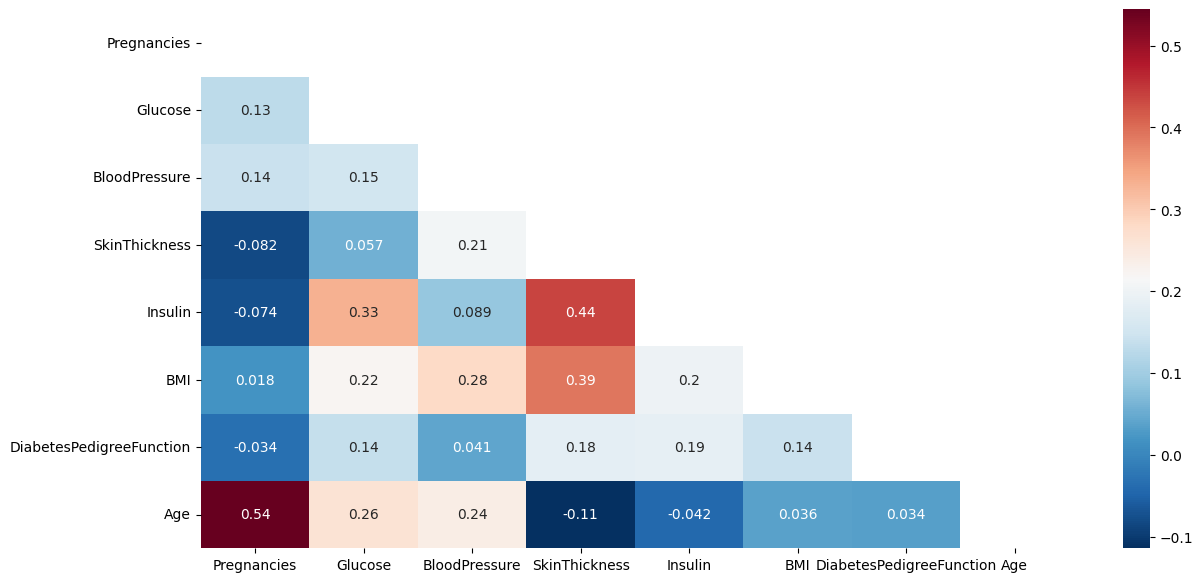

In [8]:
plt.figure(figsize=(14,7))
matriz_inf = np.triu(corr_diabetes)
sns.heatmap(corr_diabetes, cmap='RdBu_r', annot=True, mask=matriz_inf)
plt.show()

**Varibles seleccionadas:**

Ante la no presencia de correlaciones altas (fuertes), se consideran a todas las variables para la construcción de los modelos.

### **Modelo 1: Segmentación particional**

**Algoritmo: K-means**

Los clústeres mediante K-means es un aprendizaje no supervisado popular. Se utiliza para encontrar grupos intrínsecos dentro del conjunto de datos sin etiquetar y extraer inferencias de ellos.

Cuando se trabaja con clustering, dado que son algoritmos basados en distancias, es fundamental escalar los datos para que cada una de las variables contribuyan por igual en el análisis.

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
estandarizar = StandardScaler()                         # Se instancia el objeto StandardScaler o MinMaxScaler 
m_estandarizada = estandarizar.fit_transform(data_diabetes)   # Se calculan la media y desviación y se escalan los datos
pd.DataFrame(m_estandarizada)

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [10]:
#Se importan las bibliotecas
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

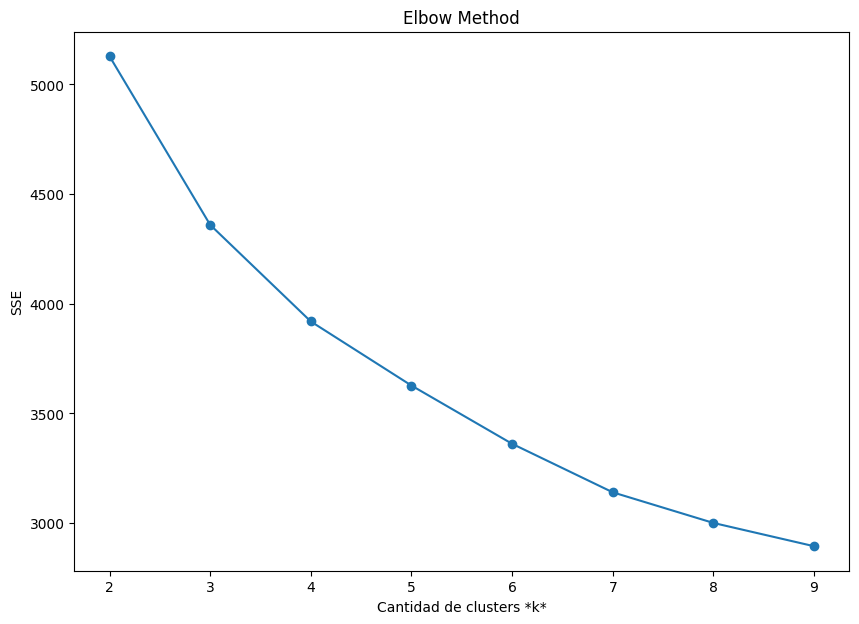

In [11]:
#Definición de k clusters para K-means
#Se utiliza random_state para inicializar el generador interno de números aleatorios
SSE = []
for i in range(2, 10):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(m_estandarizada)
    SSE.append(km.inertia_)

#Se grafica SSE en función de k
plt.figure(figsize=(10, 7))
plt.plot(range(2, 10), SSE, marker='o')
plt.xlabel('Cantidad de clusters *k*')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

**Observación.** 
En la práctica, puede que no exista un codo afilado (codo agudo) y, como método heurístico, ese "codo" no siempre puede identificarse sin ambigüedades.

In [12]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from kneed import KneeLocator
kl = KneeLocator(range(2, 10), SSE, curve="convex", direction="decreasing")
kl.elbow

4

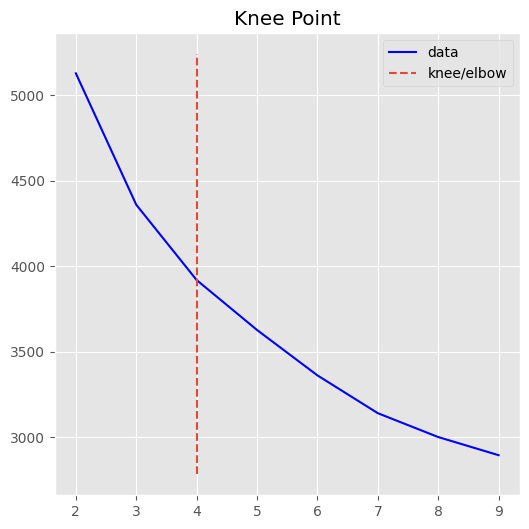

In [14]:
plt.style.use('ggplot')
kl.plot_knee()

In [15]:
#Se crean las etiquetas de los elementos en los clusters
MParticional = KMeans(n_clusters=4, random_state=0).fit(m_estandarizada)
MParticional.predict(m_estandarizada)
MParticional.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 0, 3, 0, 1, 0, 0, 2, 1, 3, 0, 3, 3, 1, 3, 2, 1, 3, 0, 0, 1, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 0, 3, 1, 3, 3, 0, 1, 1, 3, 3, 1,
       3, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 2, 3, 0, 0, 3, 0,
       0, 3, 0, 0, 0, 1, 3, 1, 0, 0, 3, 0, 2, 0, 0, 2, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 3, 3, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 3, 3, 0, 0, 0, 1, 0, 0, 3, 0, 1, 1, 0, 1, 3, 1, 3,
       1, 3, 0, 0, 0, 0, 0, 1, 3, 3, 0, 3, 1, 0, 3, 1, 3, 0, 1, 0, 1, 1,
       3, 1, 0, 0, 0, 3, 3, 3, 1, 0, 0, 3, 0, 0, 0, 0, 3, 1, 2, 0, 0, 1,
       3, 1, 3, 3, 0, 0, 0, 0, 3, 3, 1, 1, 1, 1, 0, 3, 3, 2, 3, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 3, 0, 1, 3, 0, 3, 0, 1, 3, 1, 3, 1, 1, 0, 0, 3,
       1, 3, 2, 3, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 3, 3, 1, 3, 0, 0, 0,
       0, 1, 1, 3, 3, 1, 1, 0, 3, 0, 0, 0, 3, 0, 0, 0, 1, 3, 1, 2, 0, 3,
       0, 3, 2, 1, 0, 2, 3, 0, 3, 0, 3, 1, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3,
       1, 1, 0, 0, 0, 0, 1, 1, 3, 1, 1, 1, 3, 3, 2,

In [16]:
data_diabetes['clusterP'] = MParticional.labels_
data_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,clusterP
0,6,148,72,35,0,33.6,0.627,50,3
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,3
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,3
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,3


In [17]:
#Cantidad de elementos en los clusters
data_diabetes.groupby(['clusterP'])['clusterP'].count()

clusterP
0    339
1    183
2     36
3    210
Name: clusterP, dtype: int64

In [18]:
data_diabetes[data_diabetes.clusterP == 1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,clusterP
4,0,137,40,35,168,43.1,2.288,33,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
16,0,118,84,47,230,45.8,0.551,31,1
20,3,126,88,41,235,39.3,0.704,27,1
...,...,...,...,...,...,...,...,...,...
746,1,147,94,41,0,49.3,0.358,27,1
747,1,81,74,41,57,46.3,1.096,32,1
748,3,187,70,22,200,36.4,0.408,36,1
753,0,181,88,44,510,43.3,0.222,26,1


Obtención de los centroides

In [19]:
centroides_p = data_diabetes.groupby('clusterP').mean()
centroides_p

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
clusterP,,,,,,,,
0,2.100295,102.625369,68.109145,19.507375,50.312684,29.798525,0.409496,25.958702
1,3.131148,146.530055,74.524590,34.994536,210.415301,37.287978,0.645098,32.546448
2,3.555556,117.000000,0.666667,2.000000,0.694444,25.763889,0.393167,30.444444
3,7.333333,128.714286,77.723810,12.776190,27.138095,31.987619,0.435119,46.080952


**Clúster 0:** Es un segmento conformado por 339 pacientes, con una edad promedio de 26 años; con 2 embarazos en promedio y una concentración de glucosa en la sangre de 102 mg/DL (menos de 140). Además, presenta una presión arterial de 68.1 (cantidad de presión que hay en las arterias entre un latido y otro); un espesor de pliegue cutáneo de 19.5 (espesor normal de ♂ 12 mm; ♀ 23 mm); con insulina promedio de 50.3 (curva de respuesta a la glucosa); y un índice de masa corporal (BMI) de 29.7, que permite determinar si el peso está dentro del rango normal o se tiene sobrepeso o delgadez. Este grupo tiene además una probabilidad de diabetes, según los antecedentes familiares, de 0.4.


**Clúster 1:** Grupo conformado por 183 pacientes, con una edad promedio de 32.5 años; con 3 embarazos en promedio y una concentración de glucosa en la sangre de 146 mg/DL (más de lo normal, eso es, 140). Además, presenta una presión arterial de 74.5 (cantidad de presión que hay en las arterias entre un latido y otro); un espesor de pliegue cutáneo de 34.9 (espesor normal de ♂ 12 mm; ♀ 23 mm); con insulina promedio de 210.4 (curva de respuesta a la glucosa); y un índice de masa corporal (BMI) de 37.2, que permite determinar si el peso está dentro del rango normal o se tiene sobrepeso o delgadez. Este grupo tiene además una probabilidad de diabetes, según los antecedentes familiares, de 0.64.

...

In [20]:
# Gráfica de los elementos y los centros de los clusters
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('ggplot')
colores=['red', 'blue', 'green', 'yellow']
asignar=[]
for row in MParticional.labels_:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(m_estandarizada[:, 0], 
           m_estandarizada[:, 1], 
           m_estandarizada[:, 2], marker='o', c=asignar, s=60)
ax.scatter(MParticional.cluster_centers_[:, 0], 
           MParticional.cluster_centers_[:, 1], 
           MParticional.cluster_centers_[:, 2], marker='o', c=colores, s=1000)
plt.show()

<Figure size 1000x700 with 0 Axes>

### **Modelo 2: Clasificación múltiple**

**Algoritmo: Bosques aleatorios**

Definición de las variables predictoras y variable clase

In [21]:
#Variables predictoras
X = np.array(data_diabetes[['Pregnancies', 
                       'Glucose', 
                       'BloodPressure', 
                       'SkinThickness', 
                       'Insulin', 
                       'BMI',
                       'DiabetesPedigreeFunction',
                       'Age']])
pd.DataFrame(X)

,0,1,2,3,4,5,6,7
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [22]:
#Variable clase
Y = np.array(data_diabetes[['clusterP']])
pd.DataFrame(Y)

,0
0,3
1,0
2,3
3,0
4,1
...,...
763,3
764,0
765,0
766,3


In [23]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [24]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                                                test_size = 0.2, 
                                                                                random_state = 0,
                                                                                shuffle = True)

In [25]:
print(len(X_train))
print(len(X_validation))

614
154


In [26]:
#ClasificacionBA = RandomForestClassifier(random_state=0)
#ClasificacionBA.fit(X_train, Y_train)

ClasificacionBA = RandomForestClassifier(n_estimators=105,
                                         max_depth=8, 
                                         min_samples_split=4, 
                                         min_samples_leaf=2, 
                                         random_state=1234)
ClasificacionBA.fit(X_train, Y_train)

<ipython-input-26-1204c3ce346e>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ClasificacionBA.fit(X_train, Y_train)


RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=105, random_state=1234)

In [27]:
#Clasificación final 
Y_ClasificacionBA = ClasificacionBA.predict(X_validation)
print(Y_ClasificacionBA)

[1 0 0 3 0 0 1 1 1 1 1 1 3 0 3 0 1 0 3 0 3 0 2 0 0 0 0 3 0 0 3 0 0 1 0 3 3
 0 0 1 0 0 0 1 1 0 0 0 0 0 3 0 1 3 1 0 0 3 0 2 1 1 0 2 0 3 3 3 3 3 0 2 0 3
 1 0 3 1 0 0 3 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 3 1 0 0 0 1 3 0 0 0 3 0
 3 3 1 1 3 0 1 0 3 0 3 1 3 0 0 1 0 3 0 1 2 0 1 3 3 0 0 2 0 0 1 0 3 3 0 0 3
 0 1 0 0 0 0]


In [28]:
ValoresBA = pd.DataFrame(Y_validation, Y_ClasificacionBA)
ValoresBA

,0
1,1
0,0
0,0
3,3
0,0
...,...
1,1
0,0
0,0
0,0


In [29]:
accuracy_score(Y_validation, Y_ClasificacionBA)

0.935064935064935

In [30]:
#Matriz de clasificación
ModeloClasificacion = ClasificacionBA.predict(X_validation)
Matriz_Clasificacion = pd.crosstab(Y_validation.ravel(),
                                    ModeloClasificacion,
                                    rownames=['Reales'],
                                    colnames=['Clasificación']) 
Matriz_Clasificacion

Clasificación,0,1,2,3
Reales,,,,
0,75,1,0,1
1,1,31,0,2
2,0,0,6,0
3,2,3,0,32


In [31]:
#Reporte de la clasificación
print('Criterio: \n', ClasificacionBA.criterion)
print('Importancia variables: \n', ClasificacionBA.feature_importances_)
print("Exactitud:", accuracy_score(Y_validation, Y_ClasificacionBA))
print(classification_report(Y_validation, Y_ClasificacionBA))

Criterio: 
 gini
Importancia variables: 
 [0.15729411 0.13761998 0.11965925 0.08992204 0.17357431 0.07813098
 0.03999239 0.20380693]
Exactitud: 0.935064935064935
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        77
           1       0.89      0.91      0.90        34
           2       1.00      1.00      1.00         6
           3       0.91      0.86      0.89        37

    accuracy                           0.94       154
   macro avg       0.94      0.94      0.94       154
weighted avg       0.93      0.94      0.93       154



In [33]:
Importancia = pd.DataFrame({'Variable': list(data_diabetes[['Pregnancies',
                                                        'Glucose',
                                                        'BloodPressure', 
                                                        'SkinThickness', 
                                                        'Insulin', 
                                                        'BMI',
                                                        'DiabetesPedigreeFunction',
                                                        'Age']]), 
                             'Importancia': ClasificacionBA.feature_importances_}).sort_values('Importancia', ascending=False)
Importancia

,Variable,Importancia
7,Age,0.203807
4,Insulin,0.173574
0,Pregnancies,0.157294
1,Glucose,0.137620
2,BloodPressure,0.119659
3,SkinThickness,0.089922
5,BMI,0.078131
6,DiabetesPedigreeFunction,0.039992


In [34]:
Estimador = ClasificacionBA.estimators_[50]
Estimador

DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=4, random_state=650164161)

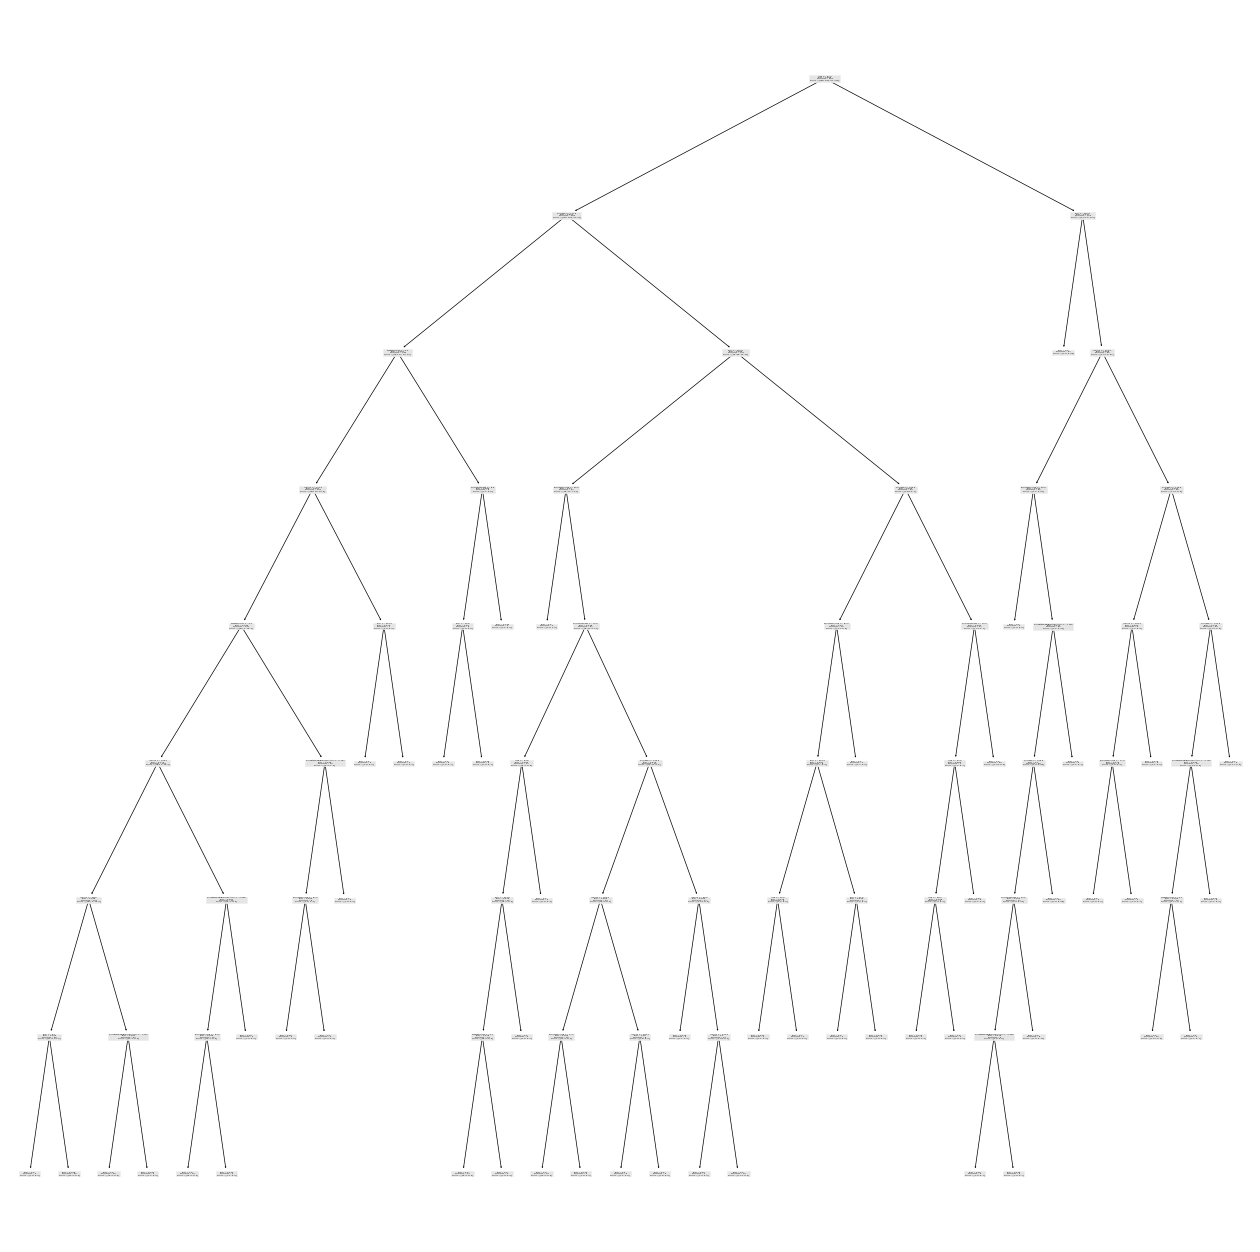

In [35]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))  
plot_tree(Estimador, 
          feature_names = ['Pregnancies',
                           'Glucose',
                           'BloodPressure',
                           'SkinThickness',
                           'Insulin',
                           'BMI',
                           'DiabetesPedigreeFunction',
                           'Age'])
plt.show()

In [36]:
from sklearn.tree import export_text
Reporte = export_text(Estimador, 
                      feature_names = ['Pregnancies',
                           'Glucose',
                           'BloodPressure',
                           'SkinThickness',
                           'Insulin',
                           'BMI',
                           'DiabetesPedigreeFunction',
                           'Age'])
print(Reporte)

|--- Age <= 37.50
|   |--- Glucose <= 117.50
|   |   |--- Pregnancies <= 6.50
|   |   |   |--- Insulin <= 171.50
|   |   |   |   |--- Pregnancies <= 5.50
|   |   |   |   |   |--- Insulin <= 108.00
|   |   |   |   |   |   |--- Insulin <= 28.50
|   |   |   |   |   |   |   |--- BMI <= 9.10
|   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |   |--- BMI >  9.10
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- Insulin >  28.50
|   |   |   |   |   |   |   |--- DiabetesPedigreeFunction <= 1.03
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- DiabetesPedigreeFunction >  1.03
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- Insulin >  108.00
|   |   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.54
|   |   |   |   |   |   |   |--- BloodPressure <= 84.00
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- BloodPressure >  84.00
|   |   |   |   |   |   |   |   

In [37]:
#Rendimiento
from sklearn.preprocessing import label_binarize
y_score = ClasificacionBA.predict_proba(X_validation)
y_test_bin = label_binarize(Y_validation, classes=[0,
                                                   1, 
                                                   2, 
                                                   3])
n_classes = y_test_bin.shape[1]

AUC para la clase 1: 0.9929161747343564
AUC para la clase 2: 0.9904411764705882
AUC para la clase 3: 1.0
AUC para la clase 4: 0.9900669900669901


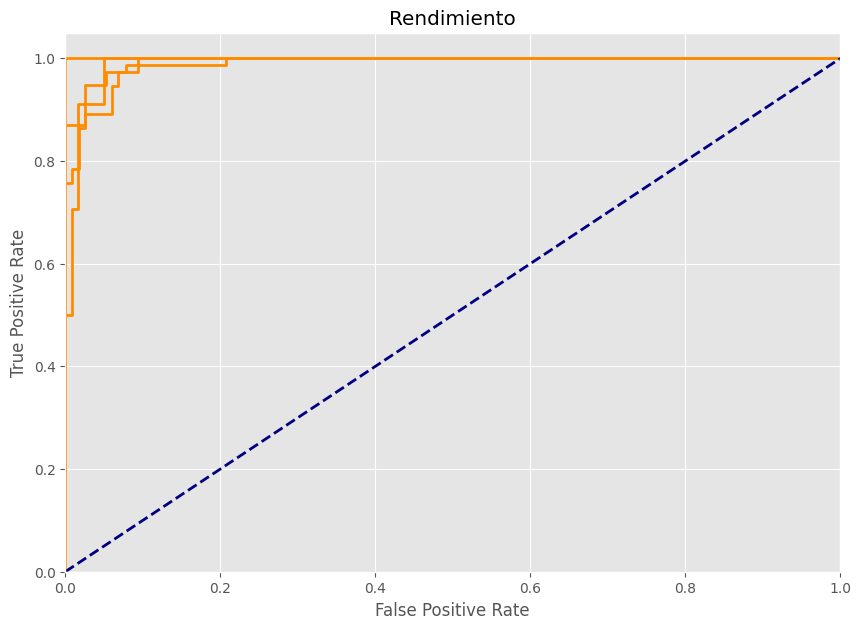

In [39]:
#Se calcula la curva ROC y el área bajo la curva para cada clase
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC para la clase {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Rendimiento')
plt.show()

#### **Nuevas clasificaciones**

In [40]:
#Paciente
PacienteBA = pd.DataFrame({'Pregnancies': [6],
                           'Glucose': [148],
                           'BloodPressure': [72],
                           'SkinThickness': [35],
                           'Insulin': [0],
                           'BMI': [33.6],
                           'DiabetesPedigreeFunction': [0.627],
                           'Age': [50]})
ClasificacionBA.predict(PacienteBA)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([3], dtype=int32)